In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [6]:
frame_length = 0.025
frame_stride = 0.010

Wav length : 51.02825, Mel_S shape:(40, 5103)


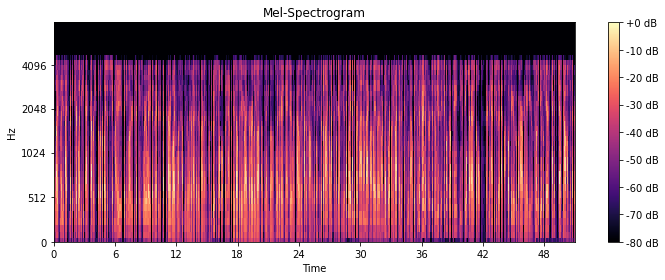

In [7]:
def Mel_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr = 16000)
    
    #wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))
    
    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)
    
    print("Wav length : {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))
    
    
    plt.figure(figsize=(10,4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()
    
    return S

original_data = 'speech_data/male.wav'
mel_spec = Mel_S(original_data)